In [ ]:
# Import all necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


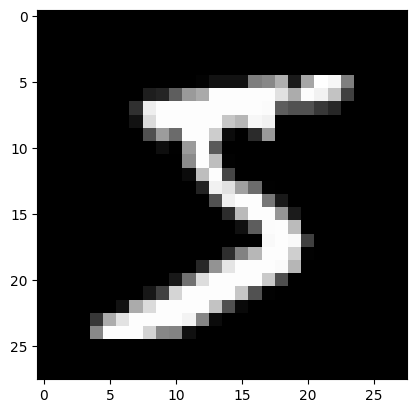

In [ ]:
# Plot the grayscale image of the first sample
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [13]:
# Normalize the pixel values to be between 0 and 1 so that the model can converge faster
x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
# Create the model, which is a simple feedforward neural network with 1 hidden layer,
# softmax activation function for the output layer to get the probabilities of each class
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam', # Use the Adam optimizer for training since it is computationally efficient
    loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']) # Use accuracy as the metric to evaluate the model

In [18]:
history = model.fit(x_train, y_train, epochs=5) # Train the model for 5 epochs
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8731 - loss: 0.4424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9639 - loss: 0.1246
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9758 - loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0557
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9875 - loss: 0.0423
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9727 - loss: 0.0921
Test accuracy: 97.63%


In [19]:
predictions = model.predict(x_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
[[3.24739489e-08 1.77873583e-09 1.41779469e-06 ... 9.99962628e-01
  1.13319715e-07 8.01353508e-07]
 [1.19756422e-07 1.00228866e-03 9.98990715e-01 ... 1.17260707e-13
  2.06575601e-06 1.16693218e-11]
 [3.20641789e-07 9.99409497e-01 3.22270731e-04 ... 9.47640583e-05
  1.06627813e-04 1.93848010e-07]
 ...
 [2.44582653e-11 8.98977670e-10 1.46299216e-12 ... 1.86013352e-07
  2.66056581e-08 2.79098822e-05]
 [1.54360214e-09 2.29096742e-09 5.16366568e-11 ... 9.20632237e-10
  7.51417974e-05 2.18234111e-12]
 [1.39907472e-08 4.25188443e-12 3.15205639e-09 ... 9.34587863e-15
  2.92843749e-10 1.03252031e-12]]


7


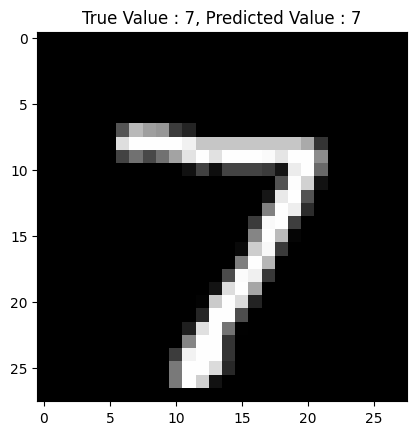

In [ ]:
print(np.argmax(predictions[0])) # Get the index of the highest probability
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value : {y_test[0]}, Predicted Value : {np.argmax(predictions[0])}")
plt.show()